In [133]:
import numpy as np
import matplotlib.pylab as plt

In [134]:
import sys
sys.path.append('..')
from fit_peak import fit_peak

In [135]:
!ls ./

ARB_16nm		PvdSi_sinus2psi_Cu220.csv  sinus2_psi_v2.ipynb
LaB6_sinus2psi_110.csv	sinus2_psi-Copy1.ipynb


In [136]:
lmbda = 1.5405929 # Ang., x-ray wavelength   K_alpha1 Cu
def distance_from_Bragg(deux_theta):
    deux_theta = np.asarray(deux_theta)
    return lmbda/2/np.sin(deux_theta/2 *np.pi/180)

## ARB16nm_sinus2psi_200Nb_phi0_psi_range120

In [137]:
ls {dirname}

2019_04_sinus2psi_112Nb_220Cu_psi30_phi180_10s.csv
2019_04_sinus2psi_200Nb_phi0_psi_range120.csv
2019_04_sinus2psi_Nb112_Cu220.csv
2019_05_sinus2psi_112Nb_220Cu_psi30_phi45_10s.csv
2019_05_sinus2psi_112Nb_220Cu_psi30_phi45+180_10s.csv
2019_05_sinus2psi_112Nb_220Cu_psi30_phi90_10s.csv
2019_05_sinus2psi_112Nb_220Cu_psi30_phi90+180_10s.csv


In [141]:
def get_and_fit_data(filename, mask_function, skip_header=34):
    
    
    
    data = np.genfromtxt(filename, skip_header=skip_header, delimiter=',')

    deux_theta_span = np.unique(data[:, 0])
    psi_span = np.unique(data[:, 1])
    I = data[:, 2].reshape((len(psi_span), len(deux_theta_span)))

    #plt.plot(deux_theta_span, I.T);
    #plt.xlabel('deux theta (deg)');
    #plt.title(filename);

    mask = mask_function(deux_theta_span)
    
    fitted_pos = []
    intensites = []
    fit_errors = []
    fwhm = []
    for k, psi in enumerate(psi_span):
        #plt.plot(deux_theta_span, I[k, :], 'xk', alpha=0.2)

        deuxtheta_peak, I_peak  = deux_theta_span[mask], I[k, mask]
        x0, largeur, fitted_function = fit_peak(deuxtheta_peak, I_peak)
        sum_errors = np.sum( (fitted_function(deuxtheta_peak)-I_peak)**2 )/fitted_function(x0)
        #plt.plot(deuxtheta_peak, fitted_function(deuxtheta_peak), 'r')
        intensites.append(fitted_function(x0))
        fitted_pos.append(x0)
        fit_errors.append(sum_errors)
        fwhm.append(largeur)
        
    # Axe change
    sin2psi = np.sin(psi_span *np.pi/180)**2
    d_hkl = distance_from_Bragg(fitted_pos)
    
    return sin2psi, d_hkl, intensites, fit_errors, fwhm

In [142]:
ls {dirname}

2019_04_sinus2psi_112Nb_220Cu_psi30_phi180_10s.csv
2019_04_sinus2psi_200Nb_phi0_psi_range120.csv
2019_04_sinus2psi_Nb112_Cu220.csv
2019_05_sinus2psi_112Nb_220Cu_psi30_phi45_10s.csv
2019_05_sinus2psi_112Nb_220Cu_psi30_phi45+180_10s.csv
2019_05_sinus2psi_112Nb_220Cu_psi30_phi90_10s.csv
2019_05_sinus2psi_112Nb_220Cu_psi30_phi90+180_10s.csv


In [143]:
dirname = 'ARB_16nm/'

def mask_function_Nb(deux_theta):
    return deux_theta < 72

def mask_function_vu(deux_theta):
    return deux_theta > 72

# Load data
data = {}

# phi = 90°  -- Niobium
filename = dirname + '2019_05_sinus2psi_112Nb_220Cu_psi30_phi90_10s.csv'
data['Nb_phi90_pos'] = get_and_fit_data(filename, mask_function_Nb)

filename = dirname + '2019_05_sinus2psi_112Nb_220Cu_psi30_phi90+180_10s.csv'
data['Nb_phi90_neg'] = get_and_fit_data(filename, mask_function_Nb)

# phi = 90°  -- Copper
filename = dirname + '2019_05_sinus2psi_112Nb_220Cu_psi30_phi90_10s.csv'
data['Cu_phi90_pos'] = get_and_fit_data(filename, mask_function_Cu)

filename = dirname + '2019_05_sinus2psi_112Nb_220Cu_psi30_phi90+180_10s.csv'
data['Cu_phi90_neg'] = get_and_fit_data(filename, mask_function_Cu)


# phi = 45° -- Niobium
filename = dirname + '2019_05_sinus2psi_112Nb_220Cu_psi30_phi45_10s.csv'
data['Nb_phi45_pos'] = get_and_fit_data(filename, mask_function_Nb)

filename = dirname + '2019_05_sinus2psi_112Nb_220Cu_psi30_phi45+180_10s.csv'
data['Nb_phi45_neg'] = get_and_fit_data(filename, mask_function_Nb)

# phi = 45° -- Copper
filename = dirname + '2019_05_sinus2psi_112Nb_220Cu_psi30_phi45_10s.csv'
data['Cu_phi45_pos'] = get_and_fit_data(filename, mask_function_Cu)

filename = dirname + '2019_05_sinus2psi_112Nb_220Cu_psi30_phi45+180_10s.csv'
data['Cu_phi45_neg'] = get_and_fit_data(filename, mask_function_Cu)


# phi = 00°  -- Niobium
filename = dirname + '2019_04_sinus2psi_Nb112_Cu220.csv'
data['Nb_phi0_pos'] = get_and_fit_data(filename, mask_function_Nb, skip_header=33)

filename = dirname + '2019_04_sinus2psi_112Nb_220Cu_psi30_phi180_10s.csv'
data['Nb_phi0_neg'] = get_and_fit_data(filename, mask_function_Nb, skip_header=34)

# phi = 00°  -- Copper
filename = dirname + '2019_04_sinus2psi_Nb112_Cu220.csv'
data['Cu_phi0_pos'] = get_and_fit_data(filename, mask_function_Cu, skip_header=33)

filename = dirname + '2019_04_sinus2psi_112Nb_220Cu_psi30_phi180_10s.csv'
data['Cu_phi0_neg'] = get_and_fit_data(filename, mask_function_Cu, skip_header=34)

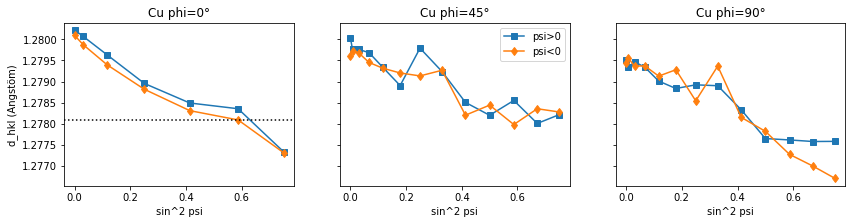

In [144]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14, 3));

data_pos = data['Cu_phi90_pos']
data_neg = data['Cu_phi90_neg']

axes[2].plot(data_pos[0], data_pos[1], label='psi>0', marker='s');
axes[2].plot(data_neg[0], data_neg[1], label='psi<0', marker='d');

axes[2].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[2].set_title('Cu phi=90°');


data_pos = data['Cu_phi45_pos']
data_neg = data['Cu_phi45_neg']

axes[1].plot(data_pos[0], data_pos[1], label='psi>0', marker='s');
axes[1].plot(data_neg[0], data_neg[1], label='psi<0', marker='d');

axes[1].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[1].set_title('Cu phi=45°');


data_pos = data['Cu_phi0_pos']
data_neg = data['Cu_phi0_neg']

axes[0].plot(data_pos[0], data_pos[1], label='psi>0', marker='s');
axes[0].plot(data_neg[0], data_neg[1], label='psi<0', marker='d');

axes[0].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[0].set_title('Cu phi=0°');


axes[0].set_ylabel('d_hkl (Angstöm)');
axes[1].legend();


a_Cu = 3.615  # Ang.
d_Cu002 = a_Cu/np.sqrt(0 + 4 + 4)
axes[0].axhline(y=d_Cu002, color='black', linestyle=':')

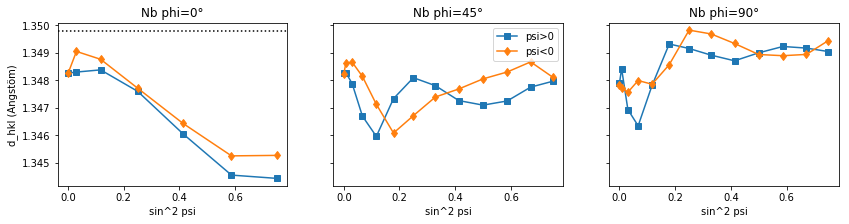

In [145]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14, 3));

data_pos = data['Nb_phi90_pos']
data_neg = data['Nb_phi90_neg']

axes[2].plot(data_pos[0], data_pos[1], label='psi>0', marker='s');
axes[2].plot(data_neg[0], data_neg[1], label='psi<0', marker='d');

axes[2].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[2].set_title('Nb phi=90°');


data_pos = data['Nb_phi45_pos']
data_neg = data['Nb_phi45_neg']

axes[1].plot(data_pos[0], data_pos[1], label='psi>0', marker='s');
axes[1].plot(data_neg[0], data_neg[1], label='psi<0', marker='d');

axes[1].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[1].set_title('Nb phi=45°');


data_pos = data['Nb_phi0_pos']
data_neg = data['Nb_phi0_neg']

axes[0].plot(data_pos[0], data_pos[1], label='psi>0', marker='s');
axes[0].plot(data_neg[0], data_neg[1], label='psi<0', marker='d');

axes[0].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[0].set_title('Nb phi=0°');


a_Cu = 3.615  # Ang.
a_Nb = 3.3063 # Ang.
d_Nb112 = a_Nb/np.sqrt(1 + 1 + 4)
axes[0].axhline(y=d_Nb112, color='black', linestyle=':')
axes[0].set_ylabel('d_hkl (Angstöm)');
axes[1].legend();

## Largeur

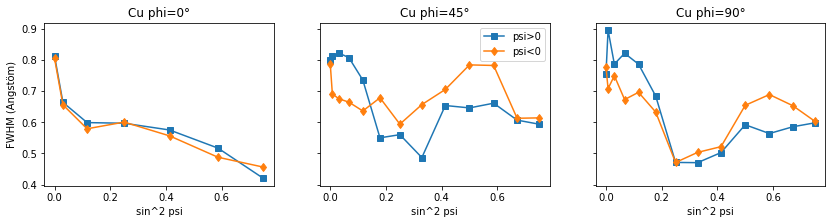

In [148]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14, 3));

data_pos = data['Cu_phi90_pos']
data_neg = data['Cu_phi90_neg']

axes[2].plot(data_pos[0], data_pos[4], label='psi>0', marker='s');
axes[2].plot(data_neg[0], data_neg[4], label='psi<0', marker='d');

axes[2].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[2].set_title('Cu phi=90°');


data_pos = data['Cu_phi45_pos']
data_neg = data['Cu_phi45_neg']

axes[1].plot(data_pos[0], data_pos[4], label='psi>0', marker='s');
axes[1].plot(data_neg[0], data_neg[4], label='psi<0', marker='d');

axes[1].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[1].set_title('Cu phi=45°');


data_pos = data['Cu_phi0_pos']
data_neg = data['Cu_phi0_neg']

axes[0].plot(data_pos[0], data_pos[4], label='psi>0', marker='s');
axes[0].plot(data_neg[0], data_neg[4], label='psi<0', marker='d');

axes[0].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[0].set_title('Cu phi=0°');


axes[0].set_ylabel('FWHM (Angstöm)');
axes[1].legend();


#a_Cu = 3.615  # Ang.
#d_Cu002 = a_Cu/np.sqrt(0 + 4 + 4)
#axes[0].axhline(y=d_Cu002, color='black', linestyle=':')

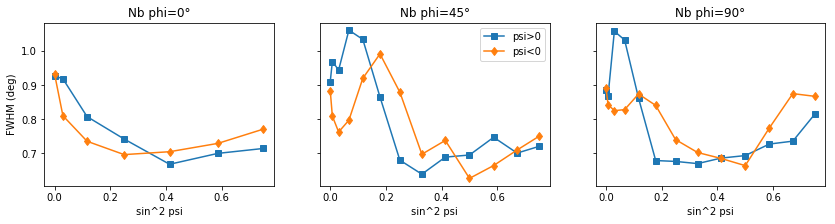

In [150]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(14, 3));

data_pos = data['Nb_phi90_pos']
data_neg = data['Nb_phi90_neg']

axes[2].plot(data_pos[0], data_pos[4], label='psi>0', marker='s');
axes[2].plot(data_neg[0], data_neg[4], label='psi<0', marker='d');

axes[2].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[2].set_title('Nb phi=90°');


data_pos = data['Nb_phi45_pos']
data_neg = data['Nb_phi45_neg']

axes[1].plot(data_pos[0], data_pos[4], label='psi>0', marker='s');
axes[1].plot(data_neg[0], data_neg[4], label='psi<0', marker='d');

axes[1].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[1].set_title('Nb phi=45°');


data_pos = data['Nb_phi0_pos']
data_neg = data['Nb_phi0_neg']

axes[0].plot(data_pos[0], data_pos[4], label='psi>0', marker='s');
axes[0].plot(data_neg[0], data_neg[4], label='psi<0', marker='d');

axes[0].set_xlabel('sin^2 psi');# plt.ylabel('d_hkl (Angstöm)');
axes[0].set_title('Nb phi=0°');


axes[0].set_ylabel('FWHM (deg)');
axes[1].legend();


#a_Cu = 3.615  # Ang.
#d_Cu002 = a_Cu/np.sqrt(0 + 4 + 4)
#axes[0].axhline(y=d_Cu002, color='black', linestyle=':')

# Draft

In [121]:
(1.345-1.350)/1.350

-0.003703703703703789

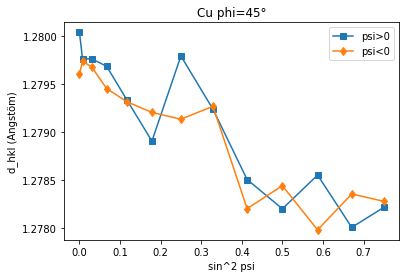

In [82]:
data_pos = data['Cu_phi45_pos']
data_neg = data['Cu_phi45_neg']

plt.plot(data_pos[0], data_pos[1], label='psi>0', marker='s')
plt.plot(data_neg[0], data_neg[1], label='psi<0', marker='d')

plt.xlabel('sin^2 psi'); plt.ylabel('d_hkl (Angstöm)');
plt.title('Cu phi=45°'); plt.legend();

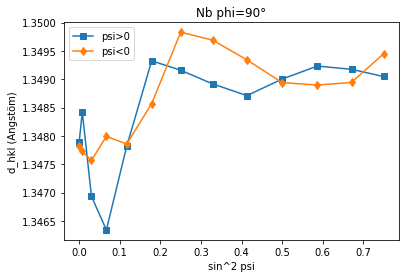

In [81]:
data_pos = data['Nb_phi90_pos']
data_neg = data['Nb_phi90_neg']

plt.plot(data_pos[0], data_pos[1], label='psi>0', marker='s')
plt.plot(data_neg[0], data_neg[1], label='psi<0', marker='d')

plt.xlabel('sin^2 psi'); plt.ylabel('d_hkl (Angstöm)');
plt.title('Nb phi=90°'); plt.legend();

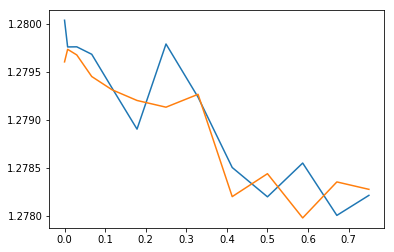

In [63]:
filename = dirname + '2019_05_sinus2psi_112Nb_220Cu_psi30_phi45_10s.csv'
data['Cu_phi45_pos'] = get_and_fit_data(filename, mask_function_Cu)

filename = dirname + '2019_05_sinus2psi_112Nb_220Cu_psi30_phi45+180_10s.csv'
data['Cu_phi45_neg'] = get_and_fit_data(filename, mask_function_Cu)

plt.plot(data['Cu_phi45_pos'][0], data['Cu_phi45_pos'][1])
plt.plot(data['Cu_phi45_neg'][0], data['Cu_phi45_neg'][1])

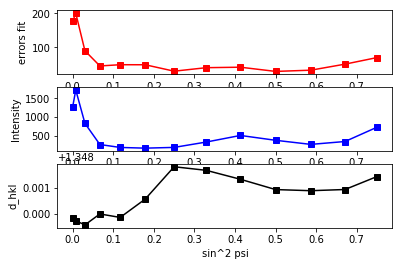

In [57]:
sin2psi, d_hkl, intensites, fit_errors = data['Nb_phi90_neg']

plt.subplot(3, 1, 1);
plt.plot(sin2psi, fit_errors, marker='s', color='red')
plt.ylabel('errors fit');

plt.subplot(3, 1, 2);
plt.plot(sin2psi, intensites, marker='s', color='blue')
plt.ylabel('Intensity');

plt.subplot(3, 1, 3);
plt.plot(sin2psi, d_hkl, marker='s', color='black')
plt.ylabel('d_hkl');

plt.xlabel('sin^2 psi');

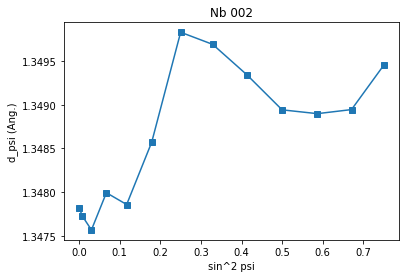

In [24]:

plt.plot(sin2psi,
         d_phipsi,
         marker='s')
plt.xlabel('sin^2 psi'); plt.ylabel('d_psi (Ang.)');
plt.title('Nb 002');

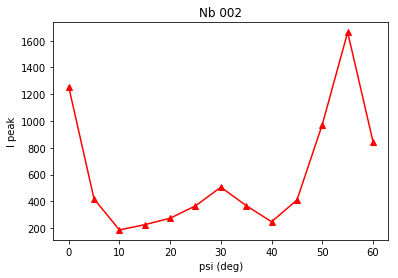

In [17]:
plt.plot(psi_span, intensites, '^-r');
plt.xlabel('psi (deg)'); plt.ylabel('I peak');
plt.title('Nb 002');

In [13]:
pente_estimation = np.ptp(d_phipsi) / np.ptp(sin2psi)
d0 = d_phipsi.max()
E, nu = 130e9, 0.35  # Pa, 1

sigma_estimation =  pente_estimation/(1+nu)*E/d0
print(f'sigma plan ~ {sigma_estimation*1e-6:0.0f} MPa')

sigma plan ~ 232 MPa


## ARB16nm_sinus2psi_Nb112_Cu220

    Cu220   74.1257°
    Nb211   69.5951°

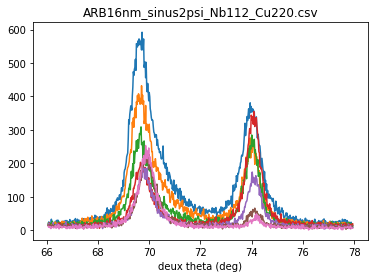

In [68]:
# Load data
filename = 'ARB16nm_sinus2psi_Nb112_Cu220.csv'
data = np.genfromtxt(filename, skip_header=33, delimiter=',')

deux_theta_span = np.unique(data[:, 0])
psi_span = np.unique(data[:, 1])
I = data[:, 2].reshape((len(psi_span), len(deux_theta_span)))

plt.plot(deux_theta_span, I.T);
plt.xlabel('deux theta (deg)');
plt.title(filename);

In [130]:
mask = deux_theta_span < 72

In [131]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,

sigma plan ~ 376 MPa


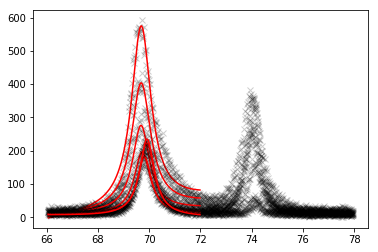

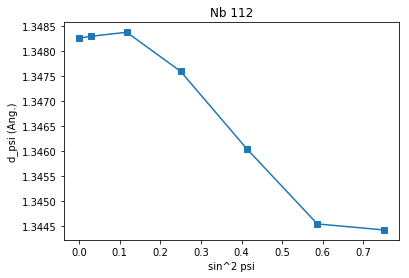

In [70]:
# Nb 112
plt.figure();
fitted_pos = []
intensites = []
for k, psi in enumerate(psi_span):
    plt.plot(deux_theta_span, I[k, :], 'xk', alpha=0.2)
    
    mask = deux_theta_span < 72
    deuxtheta_peak, I_peak  = deux_theta_span[mask], I[k, mask]
    x0, largeur, fitted_function = fit_peak(deuxtheta_peak, I_peak)
    plt.plot(deuxtheta_peak, fitted_function(deuxtheta_peak), 'r')
    intensites.append(fitted_function(x0))
    fitted_pos.append(x0)
    
# sin2 psi
sin2psi = np.sin(psi_span *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)
plt.figure();
plt.plot(sin2psi,
         d_phipsi,
         marker='s')
plt.xlabel('sin^2 psi'); plt.ylabel('d_psi (Ang.)');
plt.title('Nb 112');

# pente_estimation 
pente_estimation = np.ptp(d_phipsi) / np.ptp(sin2psi)
d0 = d_phipsi.max()
E, nu = 130e9, 0.35  # Pa, 1

sigma_estimation =  pente_estimation/(1+nu)*E/d0
print(f'sigma plan ~ {sigma_estimation*1e-6:0.0f} MPa')

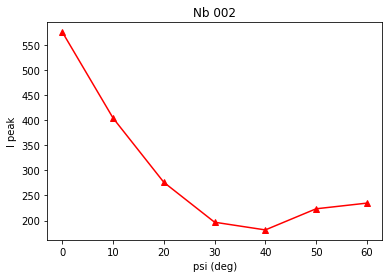

In [71]:
plt.plot(psi_span, intensites, '^-r');
plt.xlabel('psi (deg)'); plt.ylabel('I peak');
plt.title('Nb 002');

sigma plan ~ 246 MPa


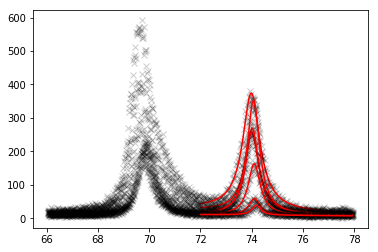

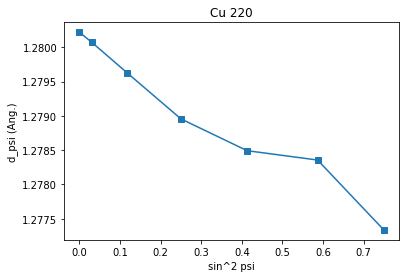

In [72]:
# Cu 220
plt.figure();
fitted_pos = []
for k, psi in enumerate(psi_span):
    plt.plot(deux_theta_span, I[k, :], 'xk', alpha=0.2)
    
    mask = deux_theta_span > 72
    deuxtheta_peak, I_peak  = deux_theta_span[mask], I[k, mask]
    x0, largeur, fitted_function = fit_peak(deuxtheta_peak, I_peak)
    plt.plot(deuxtheta_peak, fitted_function(deuxtheta_peak), 'r')
    
    fitted_pos.append(x0)
    
# sin2 psi
sin2psi = np.sin(psi_span *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)
plt.figure();
plt.plot(sin2psi,
         d_phipsi,
         marker='s')
plt.xlabel('sin^2 psi'); plt.ylabel('d_psi (Ang.)');
plt.title('Cu 220');

# pente_estimation 
pente_estimation = np.ptp(d_phipsi) / np.ptp(sin2psi)
d0 = d_phipsi.max()
E, nu = 110e9, 0.343  # Pa, 1 !!!

sigma_estimation =  pente_estimation/(1+nu)*E/d0
print(f'sigma plan ~ {sigma_estimation*1e-6:0.0f} MPa')

In [58]:
pente_estimation

0.0038449457604953596

## LaB6

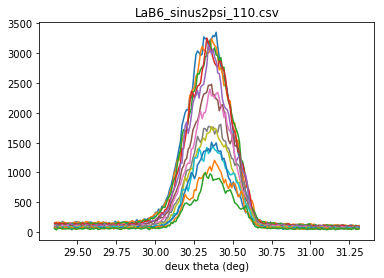

In [114]:
# Load data
filename = 'LaB6_sinus2psi_110.csv'
data = np.genfromtxt(filename, skip_header=34, delimiter=',')

deux_theta_span = np.unique(data[:, 0])
psi_span = np.unique(data[:, 1])
I = data[:, 2].reshape((len(psi_span), len(deux_theta_span)))

plt.plot(deux_theta_span, I.T);
plt.xlabel('deux theta (deg)');
plt.title(filename);

sigma plan ~ 400 MPa


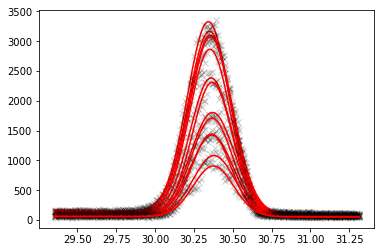

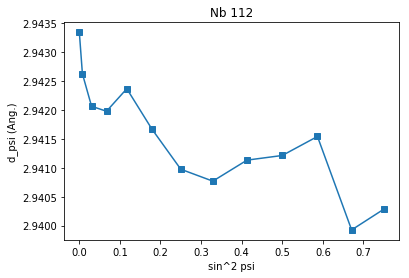

In [115]:
plt.figure();
fitted_pos = []
intensites = []
for k, psi in enumerate(psi_span):
    plt.plot(deux_theta_span, I[k, :], 'xk', alpha=0.2)
    
    mask = deux_theta_span > 0
    deuxtheta_peak, I_peak  = deux_theta_span[mask], I[k, mask]
    x0, largeur, fitted_function = fit_peak(deuxtheta_peak, I_peak, function='Gauss')
    plt.plot(deuxtheta_peak, fitted_function(deuxtheta_peak), 'r')
    intensites.append(fitted_function(x0))
    fitted_pos.append(x0)
    
# sin2 psi
sin2psi = np.sin(psi_span *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)
plt.figure();
plt.plot(sin2psi,
         d_phipsi,
         marker='s')
plt.xlabel('sin^2 psi'); plt.ylabel('d_psi (Ang.)');
plt.title('Nb 112');

# pente_estimation 
pente_estimation = np.ptp(d_phipsi) / np.ptp(sin2psi)
d0 = d_phipsi.max()
E, nu = 306e9, 0.186  # Pa, 1

sigma_estimation =  pente_estimation/(1+nu)*E/d0
print(f'sigma plan ~ {sigma_estimation*1e-6:0.0f} MPa')

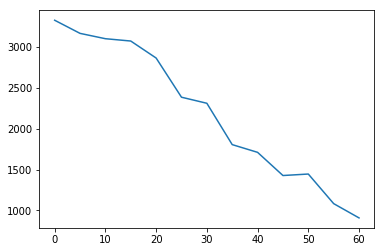

In [116]:
plt.plot(psi_span, intensites)

## PVD Si

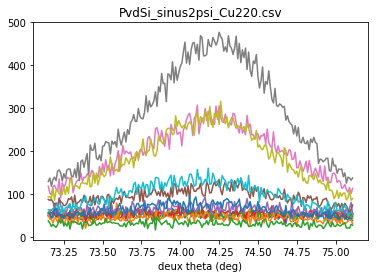

In [134]:
# Load data
filename = 'PvdSi_sinus2psi_Cu220.csv'
data = np.genfromtxt(filename, skip_header=34, delimiter=',')

deux_theta_span = np.unique(data[:, 0])
psi_span = np.unique(data[:, 1])
I = data[:, 2].reshape((len(psi_span), len(deux_theta_span)))

plt.plot(deux_theta_span, I.T);
plt.xlabel('deux theta (deg)');
plt.title(filename);

no fit
no fit
no fit
no fit
no fit


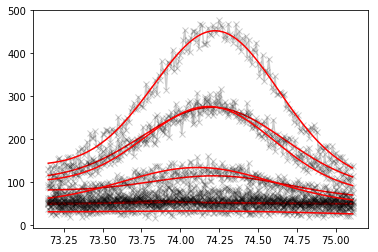

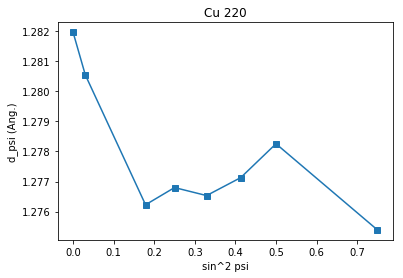

In [137]:
plt.figure();
fitted_pos, fitted_psi = [], []
intensites = []
for k, psi in enumerate(psi_span):
    plt.plot(deux_theta_span, I[k, :], '-xk', alpha=0.2)
    
    mask = deux_theta_span > 0
    deuxtheta_peak, I_peak  = deux_theta_span[mask], I[k, mask]
    try:
        x0, largeur, fitted_function = fit_peak(deuxtheta_peak, I_peak, function='Gauss')
        plt.plot(deuxtheta_peak, fitted_function(deuxtheta_peak), 'r')
        intensites.append(fitted_function(x0))
        fitted_pos.append(x0)
        fitted_psi.append(psi)
    except:
        print('no fit')
    
# sin2 psi
fitted_psi = np.array(fitted_psi)
sin2psi = np.sin(fitted_psi *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)

# sin2 psi
sin2psi = np.sin(fitted_psi *np.pi/180)**2
d_phipsi = distance_from_Bragg(fitted_pos)
plt.figure();
plt.plot(sin2psi,
         d_phipsi,
         marker='s')
plt.xlabel('sin^2 psi'); plt.ylabel('d_psi (Ang.)');
plt.title('Cu 220');

In [136]:
# pente_estimation 
pente_estimation = np.ptp(d_phipsi) / np.ptp(sin2psi)
d0 = d_phipsi.max()
E, nu = 110e9, 0.35  # Pa, 1

sigma_estimation =  pente_estimation/(1+nu)*E/d0
print(f'sigma plan ~ {sigma_estimation*1e-6:0.0f} MPa')

sigma plan ~ 557 MPa


In [4]:
1*np.pi/180 * 320

4.1887902047863905